# Problem Statement:

Customer Segmentation allows marketers to understand descrete groups of customers which can be help marketers to plan strategy to maximize the value of customer to their business,consumer experience insights, product development innovation approaches, suggestions for boosting customer loyalty, and more.

We would explore the cutomer dataset to find who are target cutomers , what kind of customers visits in the mall and try to segment them accordingly...

We have the customer dataset from a mall,can be found [here](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).

# Import Libraries

In [1]:
# Library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
import pandas as pd

# The fundamental package for scientific computing with Python
import numpy as np

# Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px   # for 3d plots 
import plotly.graph_objs as go
import plotly.offline as py

# Kmeans clustering algorithm for segmentation
from sklearn.cluster import KMeans

# The warnings module in Python is a standard library module used to suppressing warning messages
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Preprocessing Libraries
from sklearn.preprocessing import StandardScaler

# Importing Dataset

In [2]:
df =pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# Data Exploration

In [3]:
df.shape

(200, 5)

We have details regarding 200 customers

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


From the above we can see that there are no null values. The dtype of column Gender is object which will be handled futher down the line.

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


From the description of the dataset we see that on average the customers age is around 38. And we have customers:
* Having age between 18-70.
* Having an annual income between (15-137)$k
* Having an average spend score of 50
* Having an average annual income of 60,000 dollar

# Data Visualization

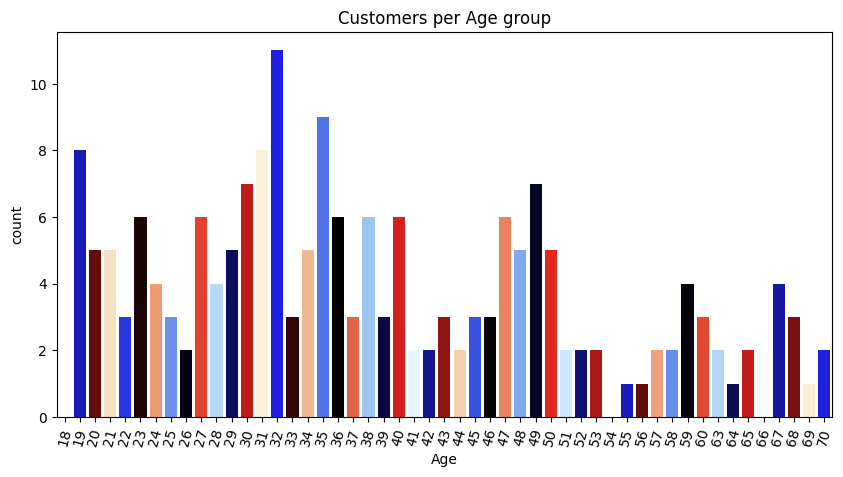

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Age',palette='flag')
plt.xticks(rotation=75)
plt.title('Customers per Age group')
plt.show()

Most of the customers here have age between 30-32, we can also look at the histogram for better conclusion of age groups.<br>
Let's look at how many of them are male and female

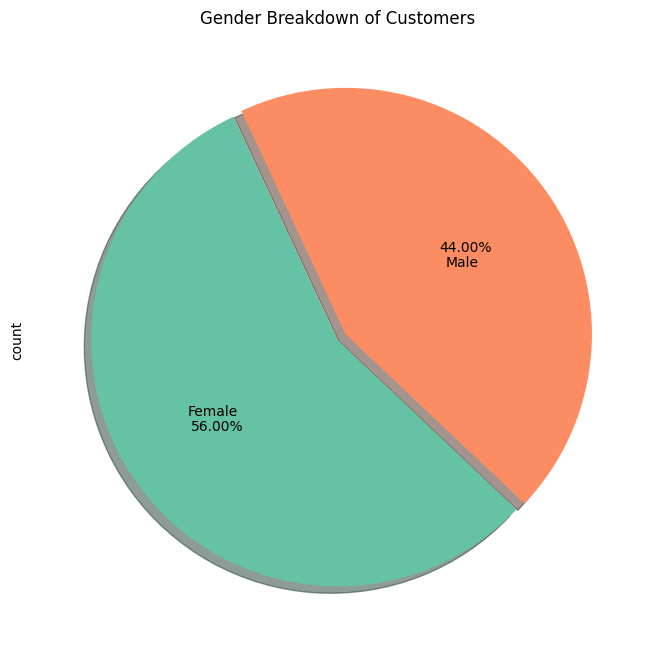

In [8]:
plt.figure(figsize=(8,8))
df['Gender'].value_counts().plot(kind='pie',
                                 autopct='%.2f%%',shadow=True,startangle=115,
                                 explode=(0,0.04),colors=sns.color_palette('Set2'),
                                 labeldistance=0.5)
plt.title('Gender Breakdown of Customers')
plt.show()

We can see that female customers are more compared to the male customers. There are 12% more female customers compared to male in the dataset. Thus we can conclude that the mall has more frequent female customers

<Figure size 1000x500 with 0 Axes>

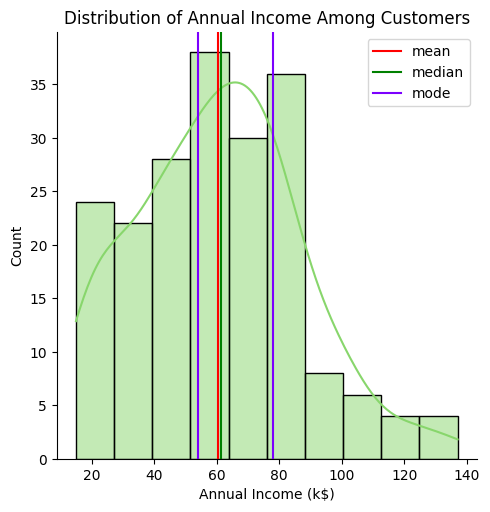

In [9]:
# Annual Income
plt.figure(figsize=(10,5))
sns.displot(data=df,x='Annual Income (k$)',kde=True,color='#88D66C',label='_hidden')
plt.title( "Distribution of Annual Income Among Customers")
mean =plt.axvline(x=df['Annual Income (k$)'].mean(),
            color='red',label='mean')
median=plt.axvline(x=df['Annual Income (k$)'].median(),
            color='green',label='median')
mode =plt.axvline(x=df['Annual Income (k$)'].mode()[0],
            color='#7C00FE',label='mode')
plt.axvline(x=df['Annual Income (k$)'].mode()[1],
            color='#7C00FE',label='mode')
plt.legend(handles=[mean,median,mode])
plt.show()

<p>The customers with income range 💲50k-💲80k are more frequent to the mall, with the majority of incomes clustering around 💲54k and 💲78k according to the mode. The distribution appears right skewed due to presence of outliers.</p>

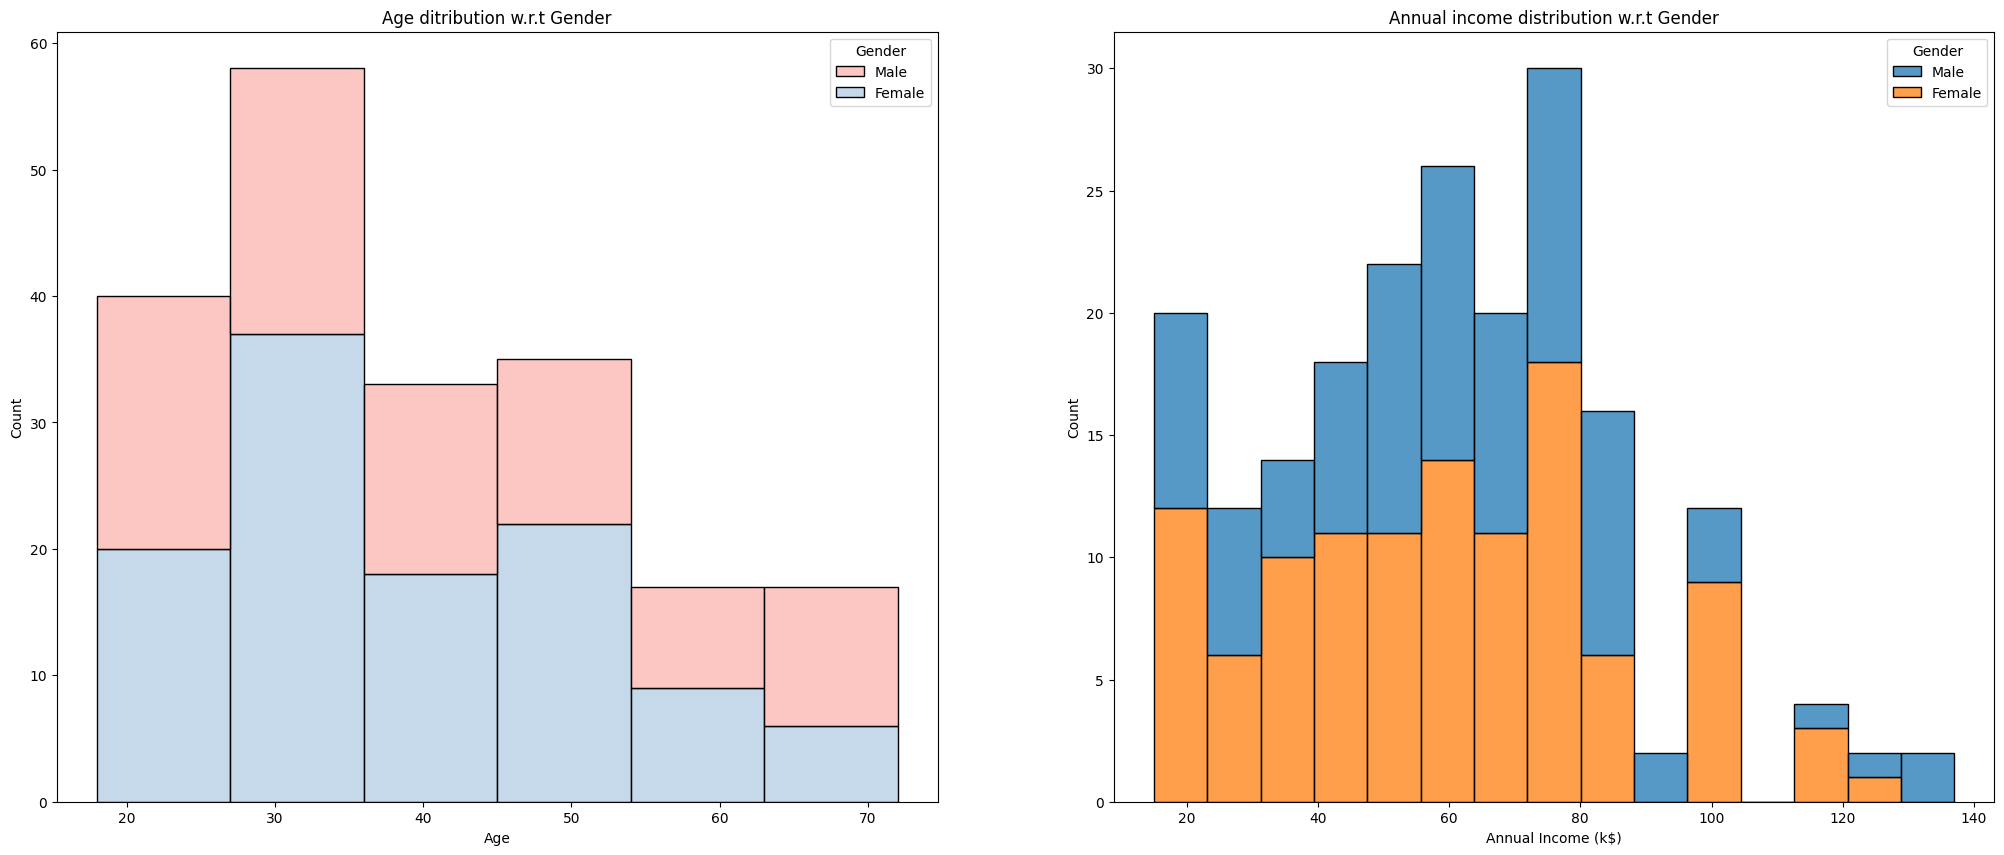

In [10]:
_,(ax0, ax1) = plt.subplots(1, 2, figsize=(25, 10))  ##plotting 2 plots
sns.histplot(data=df, x='Age', hue='Gender', binwidth=9, multiple='stack', ax=ax0,palette='Pastel1').set_title('Age ditribution w.r.t Gender')
sns.histplot(data=df,x='Annual Income (k$)',hue='Gender',bins=15,multiple='stack',ax=ax1).set_title('Annual income distribution w.r.t Gender')
plt.show()

* 20-30 and 30-40 are the most common age group customers
* The biggest age group is 30yr old customers and those are mostly women
* Most of the customers earn between 50k-80k, and those are mostly women
* Very few people earn more than 120k

Womens are dominating in terms of annual income in most of the age groups.

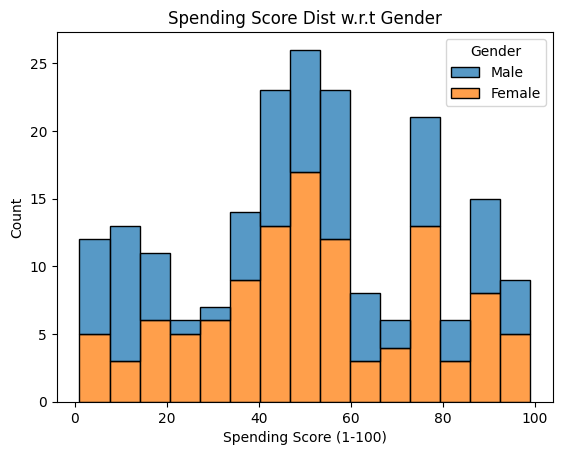

In [11]:
sns.histplot(data=df,x='Spending Score (1-100)',hue='Gender',multiple='stack',bins=15).set_title('Spending Score Dist w.r.t Gender')
plt.show()

Spending Score Trend:

* 0-20 -> men dominate
* 20-40 -> women dominate
* 40-60 -> women dominate
* 60-80 -> women dominate
* 80-100 -> women dominate

Thus men tend to have lower spending scores, while women dominating both the average and high spending score ranges.

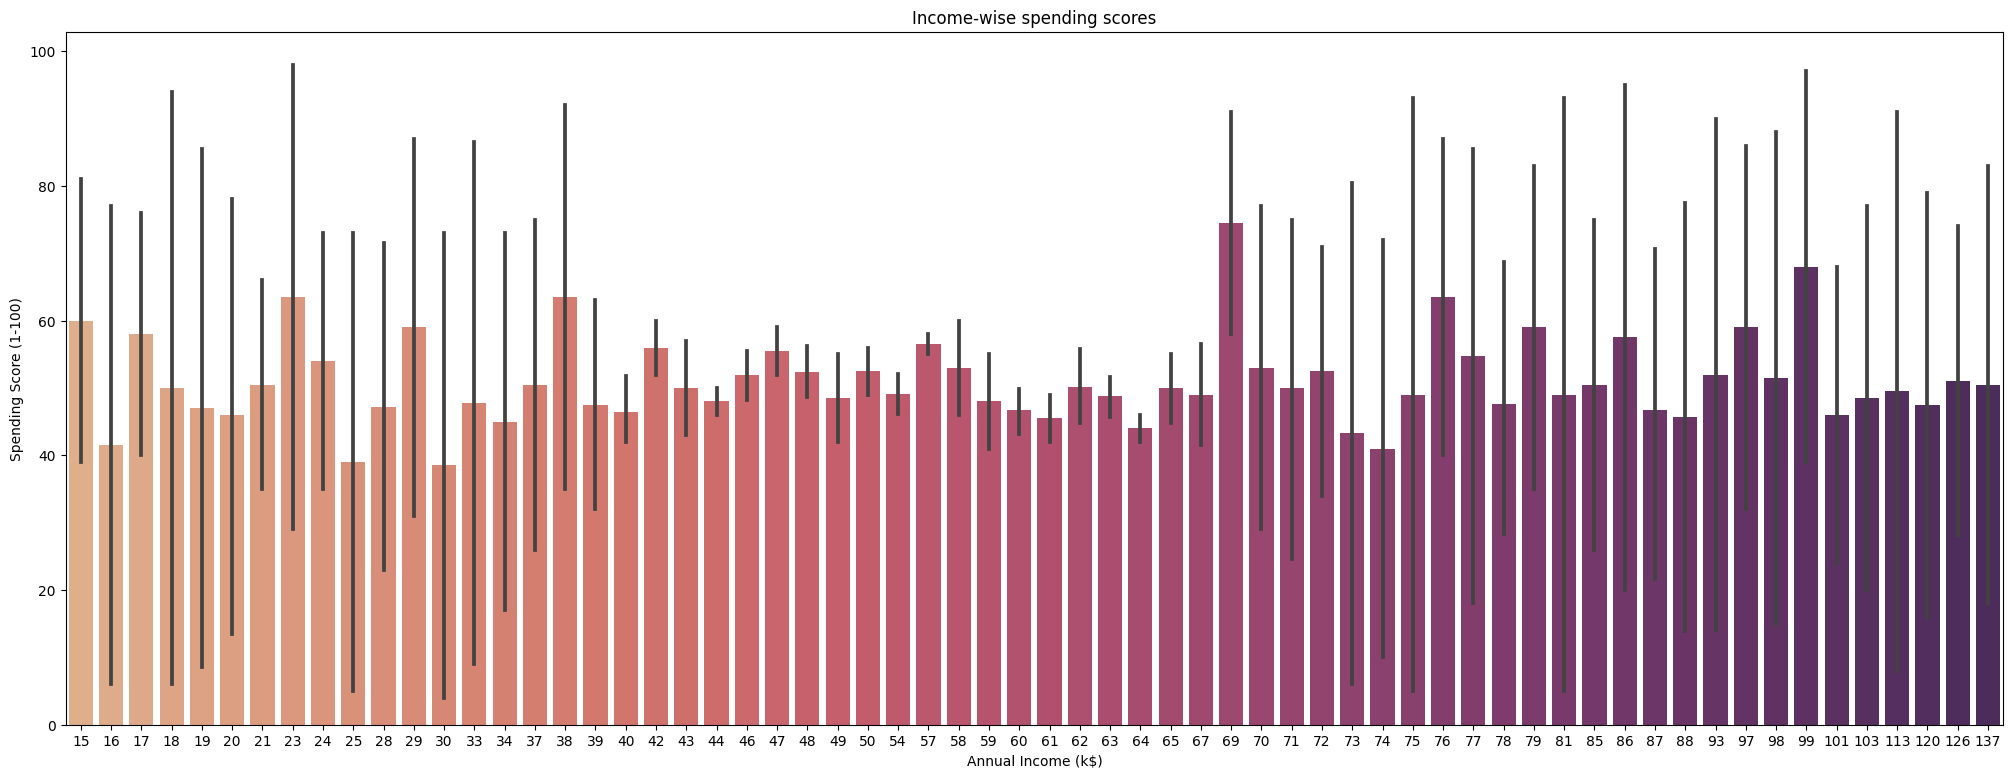

In [12]:
plt.figure(figsize=(25,9))
sns.barplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',palette='flare').set_title('Income-wise spending scores')
plt.show()

* Customers with annual income 38k and 69k have the highest spending score
* Customer with lowest and highest annual income tend to have a higher spending score. 
* While the middle income range 39k-67k tend to have comparatively lower spending score.

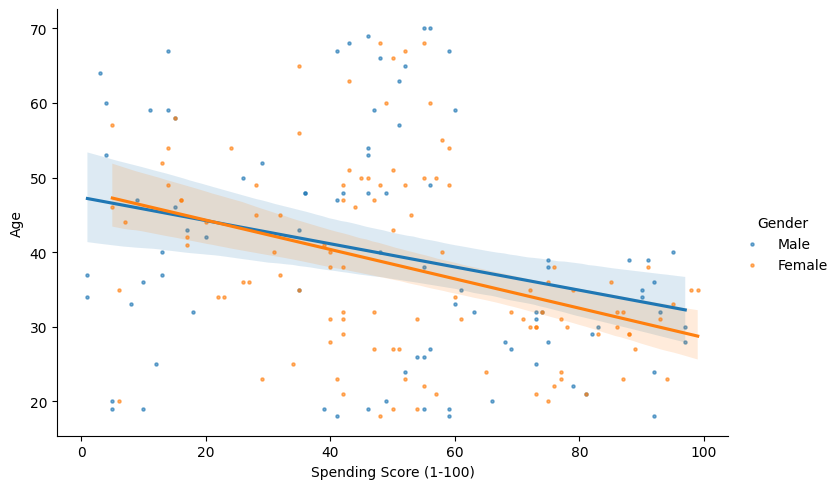

In [13]:
sns.lmplot(data=df,x='Spending Score (1-100)',y='Age',hue='Gender',aspect=1.5,scatter_kws={'s': 5, 'alpha': 0.6})
plt.show()

* We can see a linear relationship btw Spending Score and Age
* Younger customers tend to have a higher spending score and decreases when age goes up
* Younger women have a higher spending score and score decreases as the age goes up compared to men

# Encoding

In [14]:
df.Gender = df.Gender.apply(lambda x: 1 if x=='Male' else 0)

## KMeans
    
   <img src="https://miro.medium.com/v2/resize:fit:1080/1*fz-rjYPPRlGEMdTI-RLbDg.png" width=500px>
   Method for initialization:

* ‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is “greedy k-means++”. It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.

For further information visit:<br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">**KMeans --scikit-learn 1.5.1 docs**</a>

In [15]:
# Dropping columns which won't have much impact in indentifying clusters 
df.drop('CustomerID',axis=1,inplace=True)

#### Elbow method

We find the inertia for different values of clusters. Inertia is the sum of squared distances of samples to their closest cluster center and we plot a curve for inertia vs number of cluster, and  we chose k at the “elbow” point from the curve  i.e. the point after which the inertia start decreasing in a linear fashion.

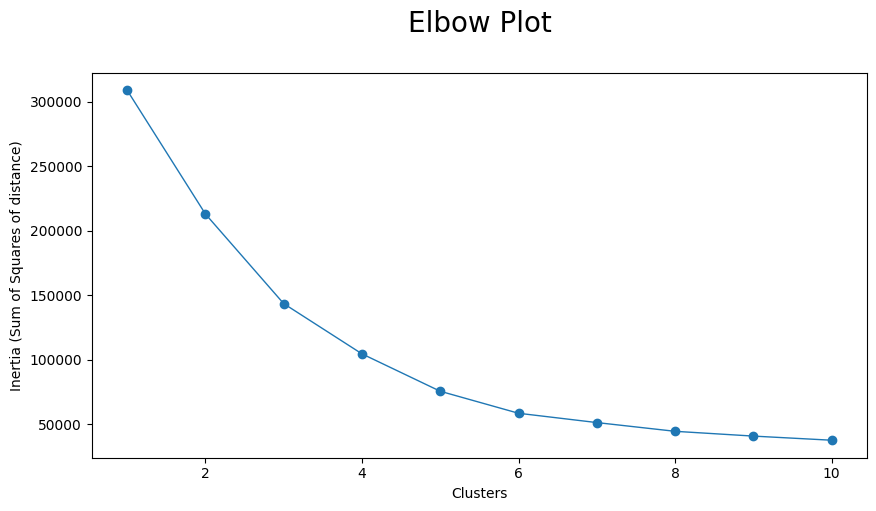

In [16]:
ssd=[]
k = range(1,11)
for i in k:
    KModel = KMeans(n_clusters=i,init='k-means++',n_init=15)
    KModel.fit(df)
    ssd.append(KModel.inertia_)

plt.figure(figsize=(10,5))
plt.plot(k,ssd,linewidth=1,marker='o')
plt.title('Elbow Plot\n',fontsize=20)
plt.xlabel('Clusters')
plt.ylabel('Inertia (Sum of Squares of distance)')
plt.show()

From the above we can see that the elbow point is 6 after which the curve becomes linear. Thus the customers can be clustered under 6 different categories.

In [17]:
# Fit the model for 6 clusters
KModel= KMeans(n_clusters=6,init='k-means++',n_init=15)
labels = KModel.fit_predict(df)

In [18]:
print(f'labels: {labels}\n\n Cluster Centroids:\n {KModel.cluster_centers_}')

labels: [5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5
 3 5 3 4 3 4 0 5 3 4 0 0 0 4 0 0 4 4 4 4 4 0 4 4 0 4 4 4 0 4 4 0 0 4 4 4 4
 4 0 4 0 0 4 4 0 4 4 0 4 4 0 0 4 4 0 4 0 0 0 4 0 4 0 0 4 4 0 4 0 4 4 4 4 4
 0 0 0 0 0 4 4 4 4 0 0 0 1 0 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]

 Cluster Centroids:
 [[ 0.34210526 27.         56.65789474 49.13157895]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.57142857 41.68571429 88.22857143 17.28571429]
 [ 0.40909091 25.27272727 25.72727273 79.36363636]
 [ 0.44444444 56.15555556 53.37777778 49.08888889]
 [ 0.38095238 44.14285714 25.14285714 19.52380952]]


In [19]:
colors = sns.color_palette(None,len(np.unique(labels)))
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)]

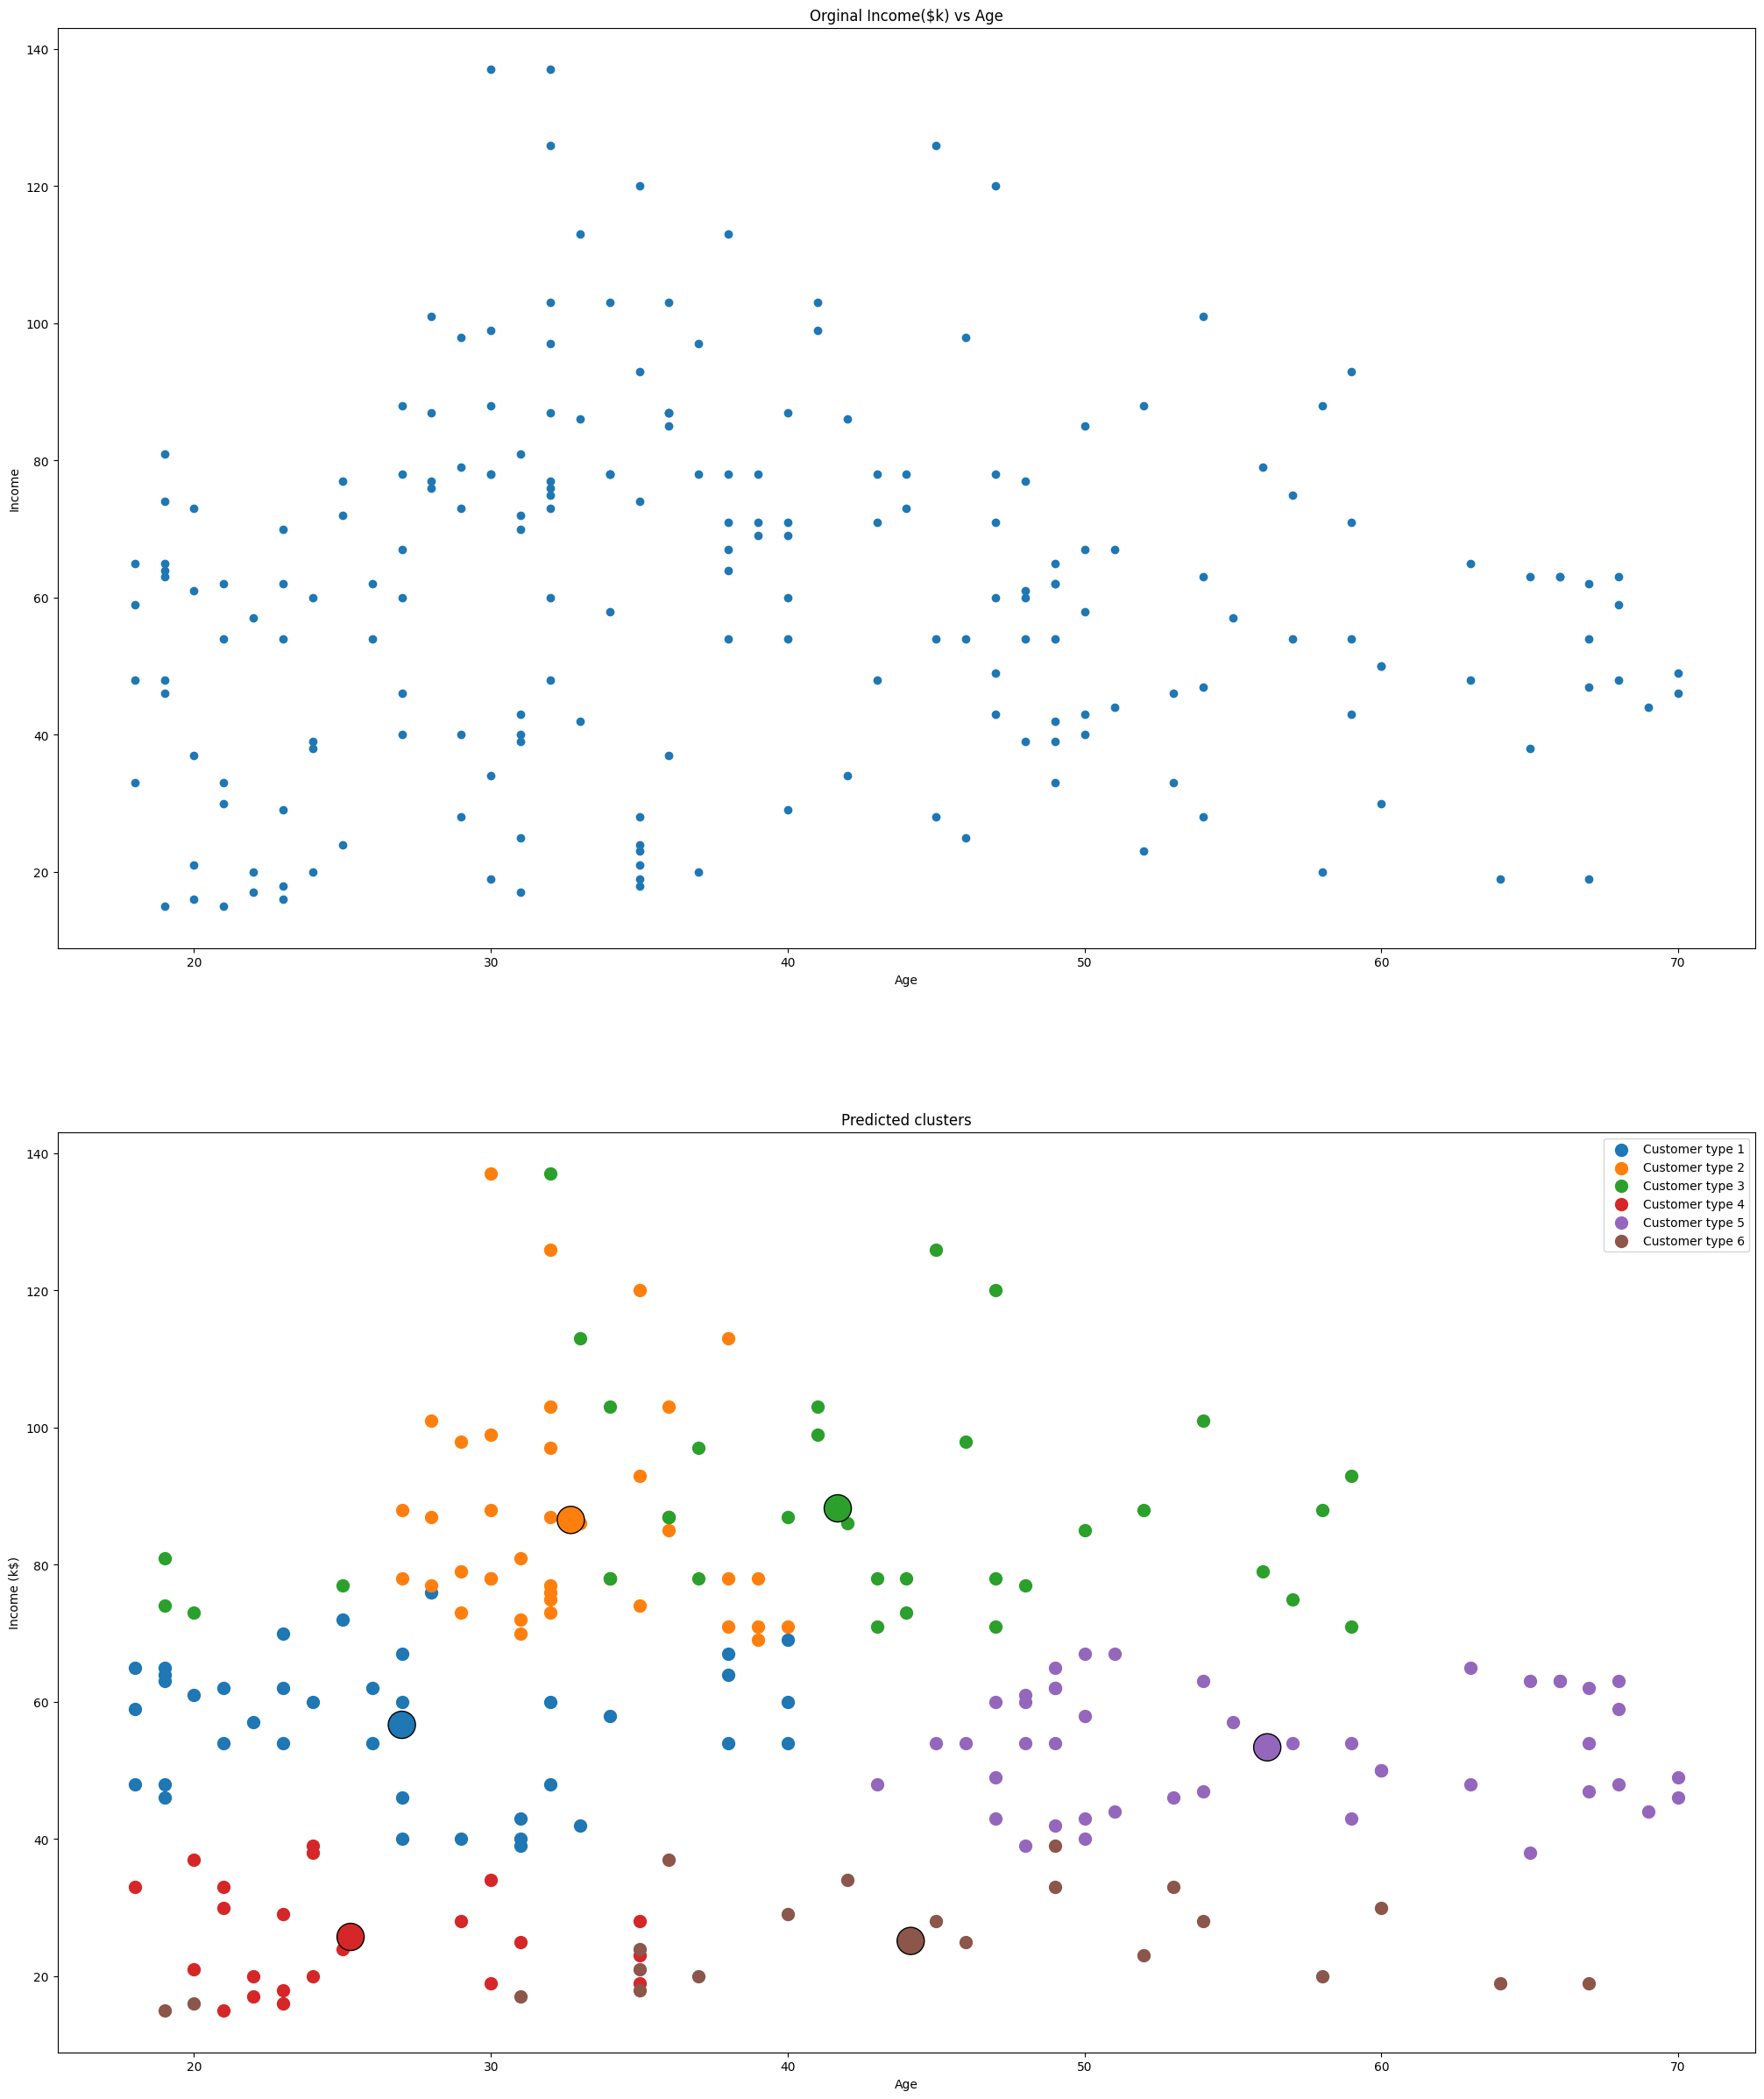

In [20]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(25,30))
#plotting original points for age vs income 
ax1.scatter(data=df,x='Age',y='Annual Income (k$)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Income')
ax1.set_title('Orginal Income($k) vs Age')

for i in np.unique(labels):
    ax2.scatter(df[labels == i]['Age'] ,df[labels == i]['Annual Income (k$)'], s = 100, color = colors[i], label = 'Customer type '+str(i+1))
#ploting the kmeans centroids
ax2.scatter(KModel.cluster_centers_[:, 1], KModel.cluster_centers_[:, 2], s = 500, color = colors,edgecolors='k')

ax2.set_title('Predicted clusters')
ax2.set_ylabel('Income (k$)')
ax2.set_xlabel('Age')
ax2.legend()
plt.show()

From above we can see the plot is not much recognizable as the boundary is not their ,lets plot the boundary shaded region for each cluster. As we need to visualise in 2d so lets train boundary for 2 axis ,x=Ages and y=Income . We can use [PCA-reduced](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py) method to plot the shaded cluster.

In [21]:
X=df.iloc[:,1:3]  # selecting 2 columns

In [22]:
algorithm = (KMeans(n_clusters=6,n_init=10,init='k-means++'))
labels1 = algorithm.fit_predict(X)
centroids= algorithm.cluster_centers_

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



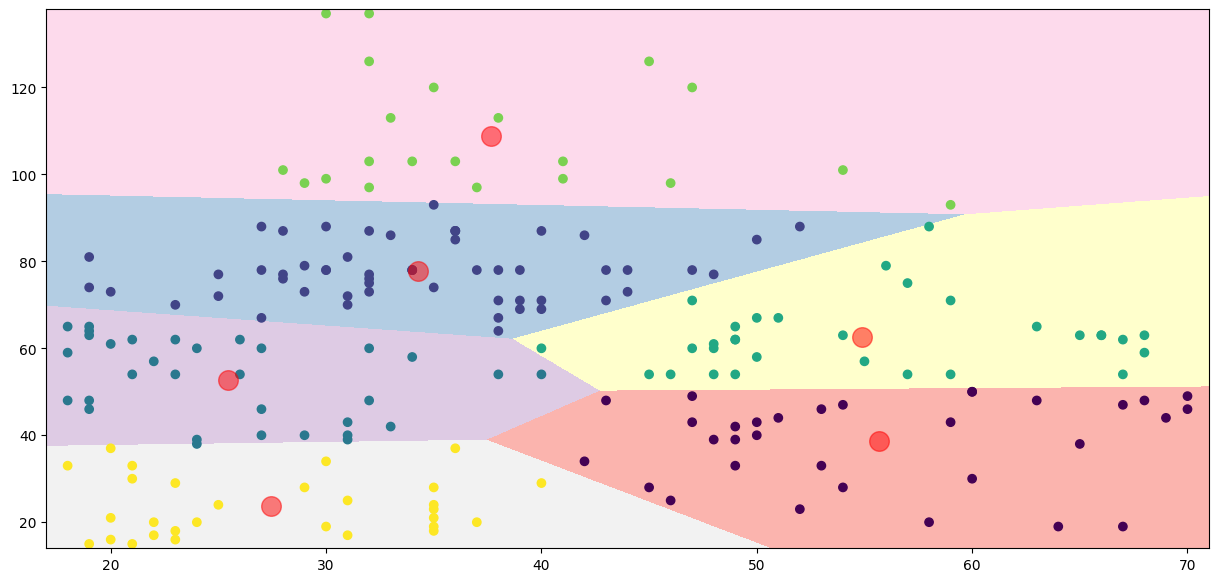

In [23]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X.iloc[:,0].min()-1, X.iloc[:,0].max()+1
y_min, y_max = X.iloc[:,1].min()-1, X.iloc[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# Obtain labels for each point in mesh. Use last trained model.
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Put the boundary points
plt.imshow(Z,interpolation='nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap=plt.cm.Pastel1,aspect='auto',origin='lower')

#Plot the datapoints
plt.scatter(data=df,x='Age',y='Annual Income (k$)',c=labels1)

#Plot the centroids
plt.scatter(x=centroids[:,0],y=centroids[:,1],c='red',s=200,alpha=0.5)

Drawbacks of K-means:
* Difficult to predict k value.
* It didn't work well with global cluster.
* Different initial partitions result in different final clusters.
* The algorithm assumes clsuters to be spherical making it unsuitable for irregular clusters.

We can address this problem via using Heirarchical Clustering

# Heirarchical Clustering

In this type of clustering we do not define initial random clusters,instead we find the pair of cluster according to the points distances and group them, we repeat this till all the points are grouped, thus its an bottom up approach.It’s also known as AGNES (Agglomerative Nesting).

<img src='https://preview.redd.it/ffy42uacxez71.gif?width=500&auto=webp&s=aab1e1c8490145c179bb3f0e872d77c018610ccf'>

Steps:
1. Make each datapoint a single-point cluster -> forms N clusters.
2. Take 2 closest datapoints and form one cluster -> forms N-1 clusters.
3. Take 2 closest clusters and form one cluster -> forms N-2 clusters.
4. Repeat step-3 until you have only one cluster left.

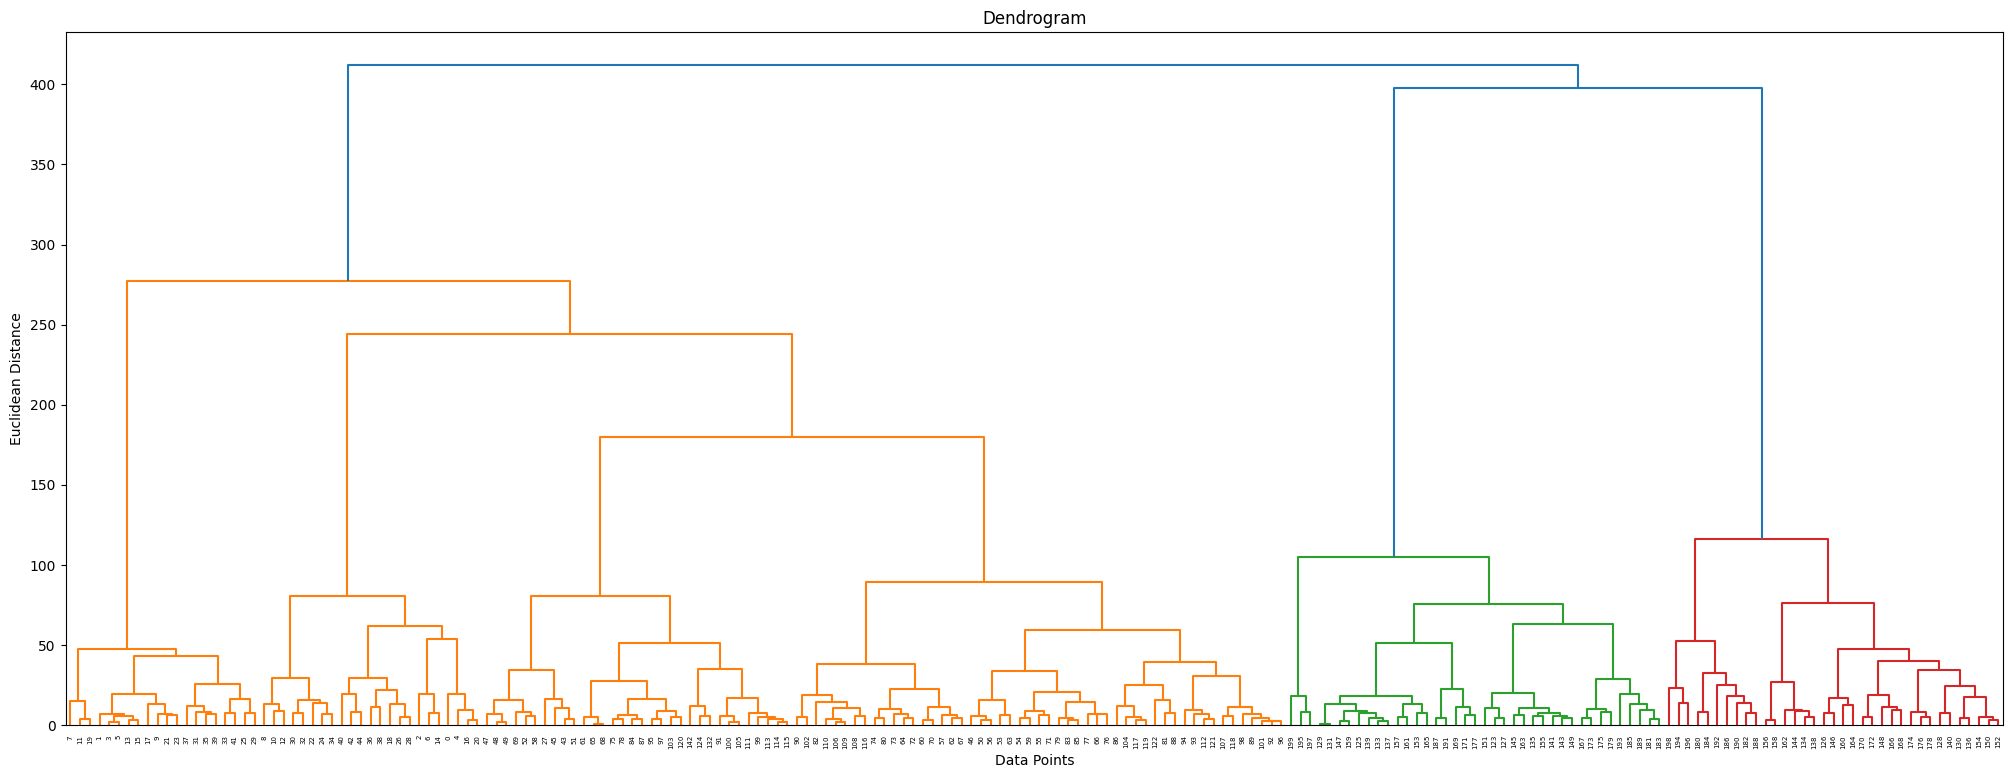

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(df,method='ward') # ward : mathematical expression
plt.figure(figsize=(25,9))
dendrogram(merg,leaf_rotation=90)

plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.title("Dendrogram")
plt.show()

Q. Where should we stop merging the clusters?

We cut the dendrogram tree at a height where the line can traverse the maximum distance up and down without intersecting the merging point.

From above plot we can cut the longest line around y=150, and we observe that we can have 6 clusters .

In [25]:
from sklearn.cluster import AgglomerativeClustering

Ac = AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
y_hc = Ac.fit_predict(df)
df['label'] = y_hc

In [26]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,0
197,1,32,126,74,2
198,1,32,137,18,0


Lets visualize the sample points in 3d with different cluster values. Iam using plotly for 3d plot.

In [27]:
#plot  3d scatter with 'Age','Income' and 'Spending score' as axis
points = go.Scatter3d(x= df['Age'],y= df['Spending Score (1-100)'],z= df['Annual Income (k$)'],mode='markers',marker=dict(color=df['label'],size=10,line=dict(color=df['label'],width=12)),opacity=0.8)
df_points = points

layout = go.Layout(title='3D Scatterplot of Age, Income, and Spending Score',margin=dict(l=0,r=0,b=0,t=0),scene=dict(xaxis=dict(title='Age'),yaxis=dict(title='Spending Score'),zaxis=dict(title='Annual Income')))
fig = go.Figure(data=df_points,layout=layout)
py.iplot(fig)

Limtation of Heirarchical clustering:<br>
* Sensitivity to noise and outliers
* Breaking large clusters
* Difficulty handling different sized clusters and convex shapes
* Sometimes it is difficult to identify the correct number of clusters by the dendogram.<br>

For more details refer [here](https://www.kindsonthegenius.com/machine-learning-questions-and-answers-questions-11-to-20/)

# DBSCAN (Density Based Spatial Clustering of Applications with Noise)

DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

<img src="https://miro.medium.com/v2/resize:fit:1280/1*kUBlldisxX6hGFEJpCisMQ.gif" width=500px>

### Components: 

1. Core Points: These are points that have a minimum number of other points (MinPts) within a certain distance (epsilon, ε). These points are in the interior of a cluster.

2. Border Points: These points have fewer than MinPts within ε, but they are within ε distance of a core point. They are on the edge of a cluster.

2. Noise Points: These points are not within ε distance of any core points. They are considered outliers and do not belong to any cluster.

### Terms

* minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense.
* eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.

Steps:-<br>
1. The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).<br>
2. If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.<br>
3. The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point
4. If anypoints fails to satisfy above critera then it would be categorise as Outliers.

In [28]:
df.drop(columns=['label'],inplace=True)  #drop the column from previous value 

In [29]:
from sklearn.cluster import DBSCAN # import dbscan lib

In [30]:
# feature scaling the datapoints as dbscan is sentsitive to outlier and large distance among data points would be calculated
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [31]:
model = DBSCAN(eps=1,min_samples=5)         
cluster_labels = model.fit_predict(X)

In [32]:
cluster_labels

array([-1,  0, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  0,  1,
        0,  0,  1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,
        1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,
        0,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1])

-1 represents outliers while the others represent different category clusters. We can see that DBSCAN has identified 2 clusters along eith few outliers.

In [33]:
fig =px.scatter_3d(x = df.iloc[:,1],y=df.iloc[:,2],z=df.iloc[:,3],color=cluster_labels,opacity=0.8,color_continuous_scale=['red','blue','green'],
                    width=900,height=800)
fig.update_layout(font_family='monospace',scene=dict(xaxis=dict(title='Age'), yaxis=dict(title='Annual Income'),zaxis=dict(title='Spending Score')),
                 title=dict(text='Customers Cluster in 3D',x=0.5,y=0.95,font=dict(color='#636363',size=20)),
                 coloraxis_showscale=False)
fig.show()

# Conclusion

* The avg age of customers is 38 and all kind of customers from income range 15k-117k visit the mall.
* Most of the customers are women so we should consider stocking a diverse range of products that cater to the interests, needs, and preferences of female customers.
* Most of the customers belong to the income range 50k-80k, so we should focus on products that fit in the income range of these customers to maximize the profit.
* Using k-means and heirarchical algo we can divide the customers in 6 categories.
* DBSCAN can handle outliers and cluster points with some similarities, we achieve 2 clusters using DBSCAN.
* Outliers might represent niche customer groups with specific preferences that are not addressed by the mainstream offerings. By recognizing these niches, the mall can introduce specialized products or services to cater to these unique needs.